## Decision Tree Regression model

ElasticNet에서 이용한 데이터를 사용하여, 진행해보자

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn.model_selection as skmod
import numpy as np
np.random.seed(10)

D=pd.read_csv("C:/Users/User/Desktop/kc_house_data.csv")
data=pd.DataFrame(D)
target=["price"]
features=data.columns.difference(["price",'id','date'])
category=["condition",'waterfront']
numeric=[x for x in features if x not in category]

train,test=skmod.train_test_split(data[target+numeric],train_size=0.7,random_state=10)

In [31]:
import sklearn.tree as sktree

### Tree regression 모델 생성

In [32]:
tree_regression=sktree.DecisionTreeRegressor(criterion='squared_error',max_depth=30)

#### 과적합 확인을 위해 검증용 데이터 생성
> 4:1 비율로 분리

In [33]:
sub_train,sub_test=skmod.train_test_split(train,train_size=0.8,random_state=10)

학습
> 깊이와 가지에 대한 제한이 없으므로 과적합은 예상되는 결과임

In [34]:
tree_regression.fit(X=sub_train[numeric],y=sub_train[target])

DecisionTreeRegressor(max_depth=30)

In [35]:
predict_result=sub_test[target].copy()
predict_result["sub_predict"]=tree_regression.predict(sub_test[numeric])

#### model 평가

In [36]:
import sklearn.metrics as skmet

검증

In [37]:
skmet.r2_score(y_true=predict_result["price"],y_pred=predict_result["sub_predict"])

0.6659151842173421

테스트

In [41]:
skmet.r2_score(y_true=test[target],y_pred=tree_regression.predict(test[numeric]))

0.7125462624129195

위에서 보듯 과적합이 발생했음을 알수 있다

#### 시각화를 통해 이해해보자

In [38]:
import matplotlib.pyplot as plt

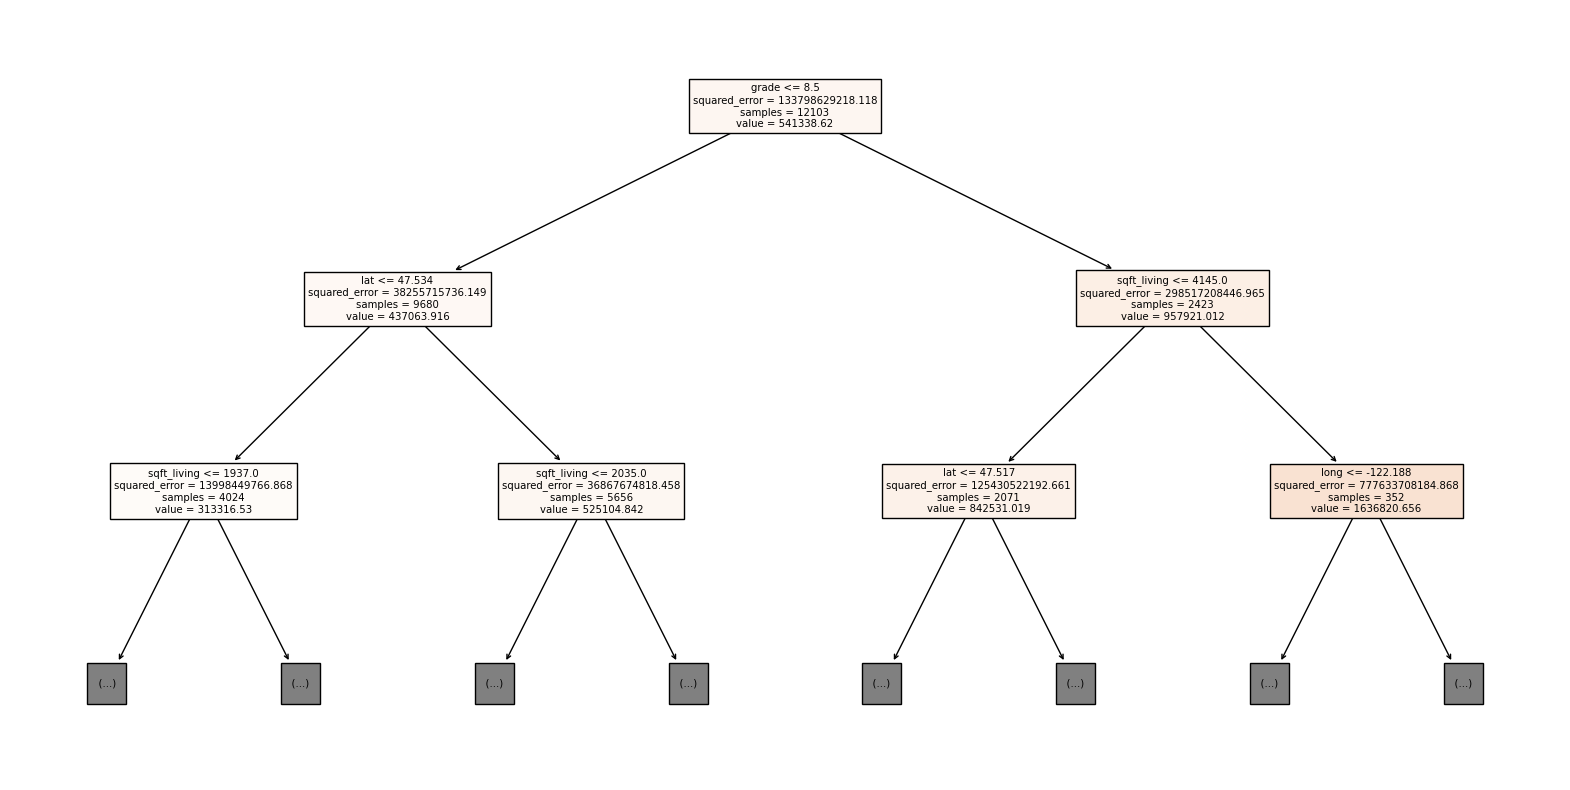

In [39]:
plt.figure(figsize=(20,10))
sktree.plot_tree(tree_regression,feature_names=list(tree_regression.feature_names_in_),filled=True,max_depth=2)
plt.show()

현 모델의 문제는 무엇일까?
> 과적합에 굉장히 취약한 모델임         
> 이는 범주형 데이터의 예측에서 Pruning을 통해 개선할 수 있었지만, numeric 데이터에 대한 regression의 경우,         
> Prunig을 진행하기에 어려움.           
> 또한 feature와 target사이의 관계해석에 어려움이 있음